# Load your data in JAXspec

Most of the data you will use when manipulating X-ray spectra will be in the form of a PHA file. This file contains the measured spectra, the background spectra, and also links to the response matrix file and the ancillary response file. 

## Loading an instrumental setup

JAXspec provides a simple way to load this data using the `Observation.from_pha_file` function. If you only want to load the instrument related data (i.e. the response matrix and the ancillary response file), you can use the `Instrument.from_ogip_file` function.


In [1]:
from jaxspec.data import Instrument

instrument = Instrument.from_ogip_file("data/PN.rmf", arf_path="data/PN.arf")

Instrument and observation objects are subclasses of `xarray`'s datasets, which mean they can be interactively explored when using jupyter notebooks.

In [2]:
instrument

Format,coo
Data Type,float32
Shape,"(4096, 2067)"
nnz,929478
Density,0.10978390897133526
Read-only,True
Size,17.7M
Storage ratio,0.55


You can display insights about your instrumental setup with the following commands

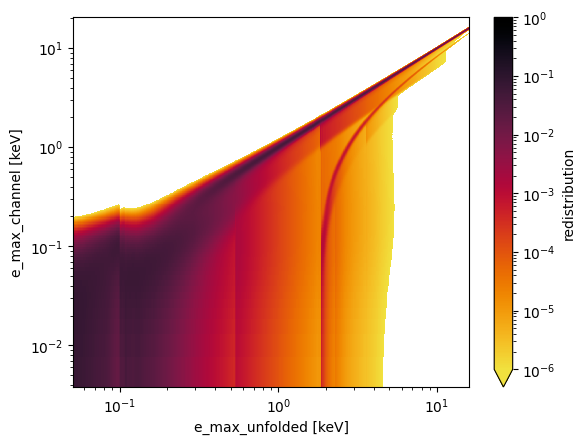

In [3]:
import matplotlib.pyplot as plt
instrument.plot_redistribution()
plt.show()

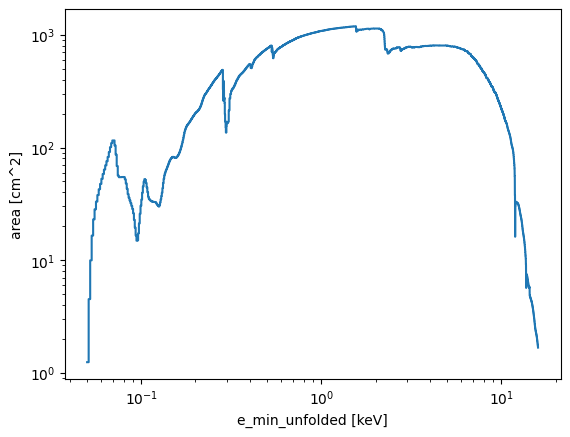

In [4]:
import matplotlib.pyplot as plt
instrument.plot_area()
plt.show()

## Loading a given observation

In [5]:
from jaxspec.data import Observation

observation = Observation.from_pha_file("data/PN_spectrum_grp20.fits")
observation

Format,coo
Data Type,bool
Shape,"(1230, 4096)"
nnz,4096
Density,0.0008130081300813008
Read-only,True
Size,68.0K
Storage ratio,0.01


You can highlight the grouping bound to your observation, and understand how you photon are packed into new bins.

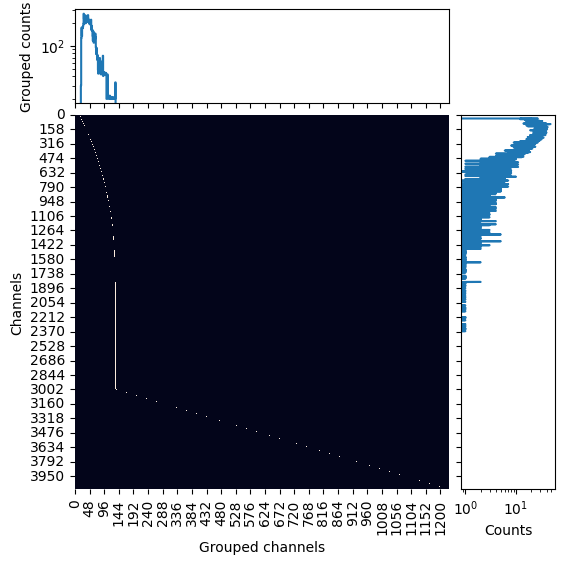

In [6]:
observation.plot_grouping()
plt.show()

## Define an Observational Setup

The `ObsConfiguration` is the key component of a `jaxspec` inference problem. It will define a transfer matrix which carries the information about how your spectrum is folded through your instrument and binned with your observation. To build a folding matrix, you usually require an instrument and an observation, and add the energy band you consider.

In [7]:
from jaxspec.data import ObsConfiguration

folding_model = ObsConfiguration.from_instrument(instrument, observation, low_energy=0.5, high_energy=8)

You can also directly load it from a .pha file

In [8]:
folding_model = ObsConfiguration.from_pha_file('data/PN_spectrum_grp20.fits', low_energy=0.5, high_energy=8)
folding_model

Format,coo
Data Type,float64
Shape,"(102, 2067)"
nnz,50028
Density,0.23728620620962462
Read-only,True
Size,781.7K
Storage ratio,0.47
